<a href="https://colab.research.google.com/github/Hramchenko/Handwritting/blob/master/colab_install_deps_min.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip3 install torch torchvision
!pip3 install opencv-python
import torch

In [2]:
print("Device " + torch.cuda.get_device_name(0))
device = torch.device("cuda:0")
print(device)

Device Tesla K80
cuda:0


In [3]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!mkdir ./IAM
!cp -R -f /gdrive/My\ Drive/ML/IAM/ascii/ ./IAM/ascii
!cp -f /gdrive/My\ Drive/ML/IAM/words.test.pkl ./IAM/
!cp -f /gdrive/My\ Drive/ML/IAM/words.train.pkl ./IAM/


In [5]:
!git clone https://github.com/Hramchenko/Handwritting.git

Cloning into 'Handwritting'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (106/106), done.
remote: Total 117 (delta 67), reused 29 (delta 9), pack-reused 0
Receiving objects: 100% (117/117), 252.34 KiB | 702.00 KiB/s, done.
Resolving deltas: 100% (67/67), done.


In [6]:
!cd ./Handwritting/ && git pull 

Already up to date.


In [0]:
import sys
sys.path.append("./Handwritting/")

In [8]:
from IAMWords import IAMWords
words = IAMWords("train", "./IAM/")

Reading ./IAM/words.train.pkl...
Reading finished


In [0]:
data, target = words.make_batch(use_binarization=False)

In [0]:
%matplotlib inline

.


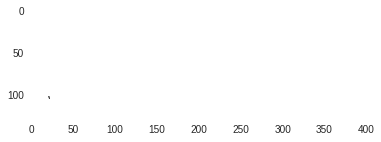

I


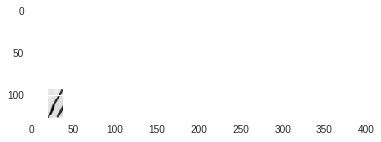

,


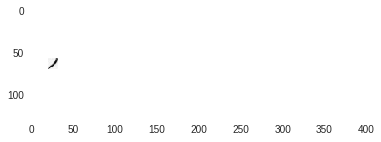

"


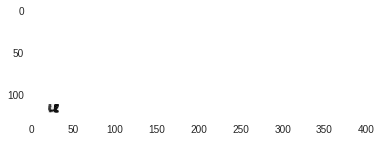

.


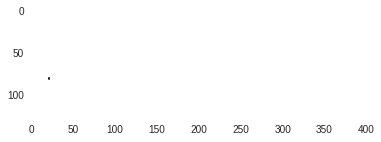

A


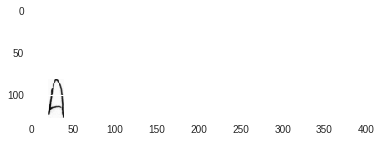

,


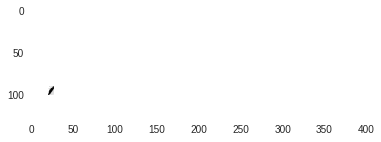

.


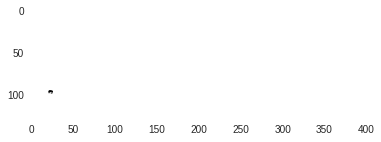

:


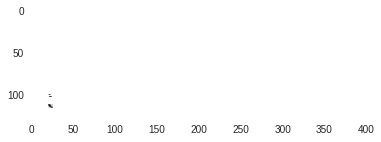

,


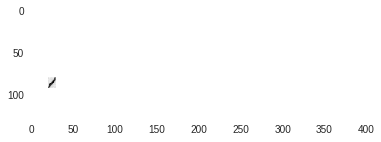

In [14]:
import matplotlib.pyplot as plt
for i in range(0, 10):
  print(words.decode_word(target[i,:]))
  plt.imshow(data[i], cmap="gray")
  plt.show()